In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 81)

In [57]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900
3,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000
4,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000


In [22]:
price = housing['SalePrice']
log_price = housing['Log_SalePrice']
features = housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
features.shape

(2580, 79)

In [8]:
features.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [5]:
X = features
y = price

X = pd.get_dummies(X)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()
model.params
model.rsquared_adj

0.9320634352423717

In [5]:
# with simple linear regression, log_price has slightly improved adjusted R^2

X = features
y = log_price

X = pd.get_dummies(X)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()
model.params
model.rsquared_adj

0.9354549717177258

In [ ]:
# Create binary variables for remodel, small/large garage

<Axes: >

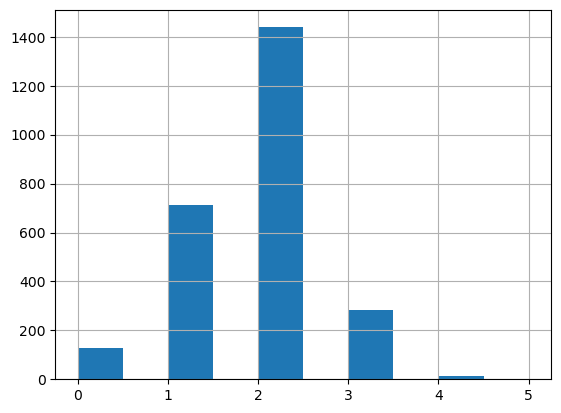

In [9]:
features['GarageCars'].hist()

In [23]:
features['GarageSize'] = np.where(features['GarageCars'] < 2, 'small', 'large')
features['GarageSize'].value_counts()

large    1739
small     841
Name: GarageSize, dtype: int64

In [24]:
features.drop(['GarageCars'], axis = 1, inplace = True)

<Axes: >

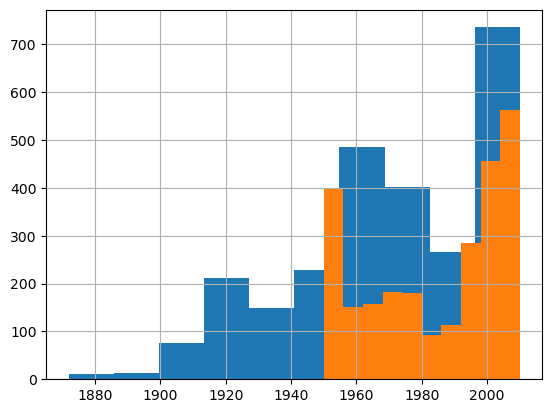

In [15]:
features['YearBuilt'].hist()
features['YearRemodAdd'].hist()

In [25]:
features['Remodel_binary'] = np.where(features['YearRemodAdd'] == features['YearBuilt'], 0, 1)
features['Remodel_binary'].value_counts()

0    1386
1    1194
Name: Remodel_binary, dtype: int64

In [26]:
features.drop(['YearRemodAdd'], axis = 1, inplace = True)

In [ ]:
# add % of lot area (proxy for yard)

In [22]:
# indoor space
features.filter(regex='SF')

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF
0,238.0,0.0,618.0,856.0,856,0,0,0,0
1,552.0,393.0,104.0,1049.0,1049,0,0,0,105
2,737.0,0.0,100.0,837.0,1001,0,0,154,0
3,0.0,0.0,405.0,405.0,717,322,0,0,0
4,643.0,0.0,167.0,810.0,810,855,0,0,45
...,...,...,...,...,...,...,...,...,...
2575,0.0,0.0,952.0,952.0,952,0,0,0,98
2576,0.0,0.0,0.0,0.0,1733,0,0,0,0
2577,284.0,0.0,717.0,1001.0,1001,1001,0,0,0
2578,841.0,0.0,144.0,985.0,985,857,0,193,96


<Axes: >

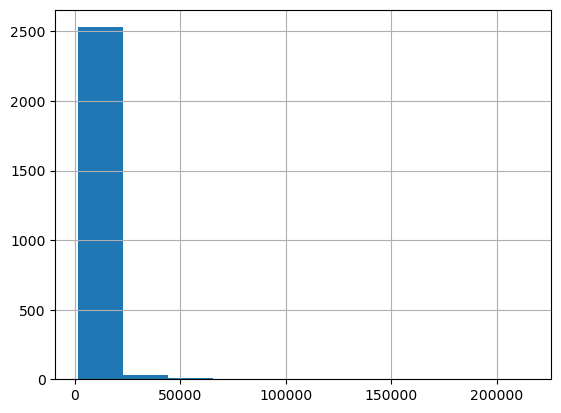

In [12]:
features['LotArea'].hist()

<Axes: >

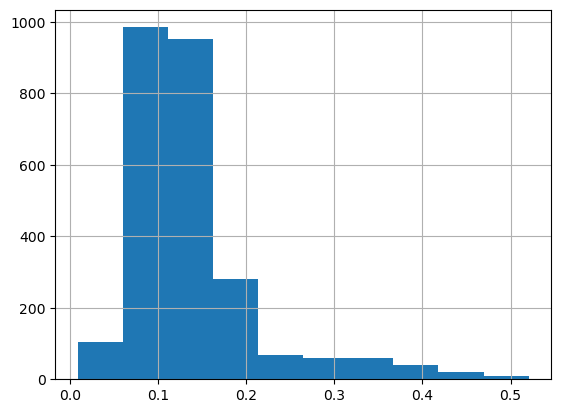

In [27]:
features['LotPercent'] = features['1stFlrSF'] / features['LotArea']
features['LotPercent'].hist()

In [ ]:
# explore features with high importance/coefficients

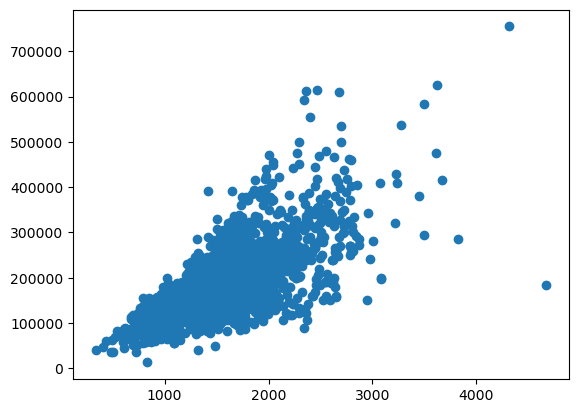

In [51]:
plt.scatter(housing['GrLivArea'], housing['SalePrice'])

In [20]:
features['LivArea_sq'] = features['GrLivArea']**2

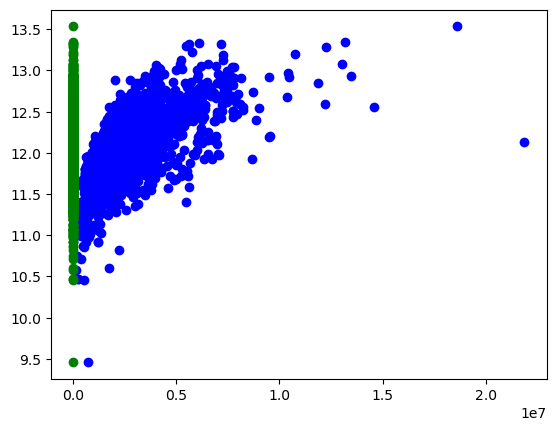

In [21]:
plt.scatter(features['LivArea_sq'], log_price, c = 'blue')
plt.scatter(features['GrLivArea'], log_price, c = 'green')

In [ ]:
# create numeric feature to describe neighborhood value

In [82]:
# welch's anova between categorial IV and continuous DV

import pingouin as 
pg.welch_anova(dv='GrLivArea', between='Neighborhood', data=housing)

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,27,159.912704,40.309139,7.920458e-58,0.289153


In [83]:
pg.welch_anova(dv='LotArea', between='Neighborhood', data=housing)

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,27,164.469333,329.846539,6.545412e-129,0.165685


/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_46800/2956654854.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['GrLivArea'].sort_values().index


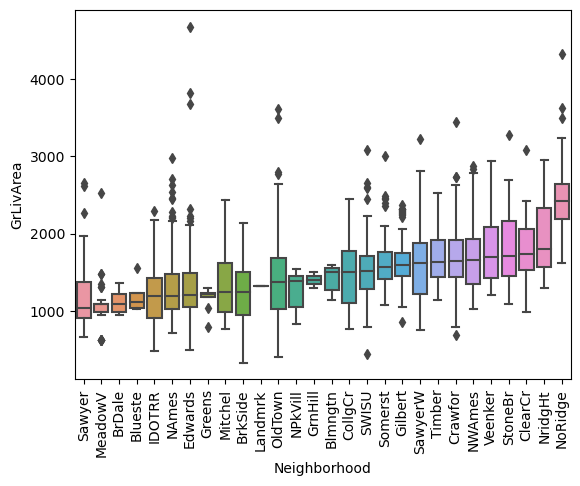

In [76]:
# explore ranking by median house size

grouped = housing.groupby(['Neighborhood'])
order = grouped.median()['GrLivArea'].sort_values().index
sns.boxplot(x = 'Neighborhood', y = 'GrLivArea', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

In [79]:
grouped = housing.groupby(['Neighborhood'])['GrLivArea'].median()
grouped.sort_values(ascending = False)

Neighborhood
NoRidge    2417.0
NridgHt    1802.0
ClearCr    1732.0
StoneBr    1714.0
Veenker    1694.0
NWAmes     1656.0
Crawfor    1647.0
Timber     1635.0
SawyerW    1617.0
Gilbert    1594.0
Somerst    1573.0
SWISU      1521.0
CollgCr    1508.5
Blmngtn    1500.0
GrnHill    1398.5
NPkVill    1381.5
OldTown    1378.0
Landmrk    1320.0
BrkSide    1252.0
Mitchel    1244.0
Greens     1226.0
Edwards    1212.0
NAmes      1200.0
IDOTRR     1198.0
Blueste    1118.0
MeadowV    1092.0
BrDale     1092.0
Sawyer     1040.0
Name: GrLivArea, dtype: float64

In [80]:
# could also use lot size instead ?
grouped = housing.groupby(['Neighborhood'])['LotArea'].median()
grouped.sort_values(ascending = False)

Neighborhood
ClearCr    16145.5
Veenker    14694.0
NridgHt    11999.0
Timber     11681.5
Crawfor    11500.0
NoRidge    11134.0
NWAmes     10928.0
Mitchel    10125.0
SawyerW     9672.0
CollgCr     9651.0
Gilbert     9556.0
NAmes       9506.5
Edwards     9350.0
Sawyer      9308.0
GrnHill     9001.0
Somerst     8125.0
OldTown     8094.0
StoneBr     8013.0
IDOTRR      7899.5
SWISU       7141.0
BrkSide     6180.0
Greens      3857.0
Landmrk     3612.0
Blmngtn     3196.0
NPkVill     2308.0
MeadowV     1895.0
Blueste     1830.5
BrDale      1680.0
Name: LotArea, dtype: float64

In [28]:
Neighborhood_HouseSize_dict = {'NoRidge': 28,
                                'NridgHt': 27,
                                'ClearCr': 26,
                                'StoneBr': 25,
                                'Veenker': 24,
                                'NWAmes': 23,
                                'Crawfor': 22,
                                'Timber': 21,
                                'SawyerW': 20,
                                'Gilbert': 19,
                                'Somerst': 18,
                                'SWISU': 17,
                                'CollgCr': 16,
                                'Blmngtn': 15,
                                'GrnHill': 14,
                                'NPkVill': 13,
                                'OldTown': 12,
                                'Landmrk': 11,
                                'BrkSide': 10,
                                'Mitchel': 9,
                                'Greens': 8,
                                'Edwards': 7,
                                'NAmes': 6,
                                'IDOTRR': 5,
                                'Blueste': 4,
                                'MeadowV': 3,
                                'BrDale': 2,
                                'Sawyer': 1
                                }

features['Neighborhood_Num'] = features['Neighborhood'].replace(Neighborhood_HouseSize_dict)

In [29]:
features.drop(['LotArea'], axis = 1, inplace = True)

In [30]:
# create interaction terms

features['Remodel_Qual'] = features['Remodel_binary']*features['OverallQual']
features['Remodel_GrLiv'] = features['Remodel_binary']*features['GrLivArea']
features['Remodel_Bath'] = features['Remodel_binary']*features['FullBath']
features['Remodel_Kitch'] = features['Remodel_binary']*features['KitchenQual']

In [31]:
features.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
      

In [32]:
housing = pd.concat([features, price, log_price], axis = 1)
housing.head()

,GrLivArea,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GarageSize,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,Remodel_Kitch,SalePrice,Log_SalePrice
0,856,1S_1945older,58.800593,6,6,1939,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,large,1,0.108492,17,6,856,1,TA,126000,11.744037
1,1049,1S_PUD,42.000000,5,5,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,small,0,0.247698,7,0,0,0,,139500,11.845820
2,1001,1S_1945older,60.000000,5,9,1930,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,small,1,0.165182,5,5,1001,1,Gd,124900,11.735269
3,1039,2S_1945older,80.000000,4,8,1900,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,small,1,0.088019,12,4,1039,1,TA,114000,11.643954
4,1665,2S_1946newer,70.000000,8,6,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,large,0,0.096429,23,0,0,0,,227000,12.332705


In [ ]:
# addressing outliers

In [36]:
# outliers in price

# calculate interquartile range and the outlier cutoff
q25, q75 = np.percentile(housing['SalePrice'], 25), np.percentile(housing['SalePrice'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# identify outliers
outliers = [x for x in housing['SalePrice'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=129975.000, 75th=209625.000, IQR=79650.000
Identified outliers: 116


In [37]:
price_trimmed = housing[(housing['SalePrice'] < upper) & (housing['SalePrice'] > lower)]
price_trimmed.shape

(2464, 86)

In [42]:
# outliers in size

# calculate interquartile range and the outlier cutoff
q25, q75 = np.percentile(housing['GrLivArea'], 25), np.percentile(housing['GrLivArea'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# identify outliers
outliers = [x for x in housing['GrLivArea'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=1112.000, 75th=1733.000, IQR=621.000
Identified outliers: 57


In [43]:
size_trimmed = housing[(housing['GrLivArea'] < upper) & (housing['GrLivArea'] > lower)]
size_trimmed.shape

(2523, 86)

In [1]:
57/2580

0.022093023255813953

In [44]:
# or use log(sale price) to reduce outliers

# after log, reduce # outliers by 50%
q25, q75 = np.percentile(housing['Log_SalePrice'], 25), np.percentile(housing['Log_SalePrice'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

outliers = [x for x in housing['Log_SalePrice'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=11.775, 75th=12.253, IQR=0.478
Identified outliers: 53


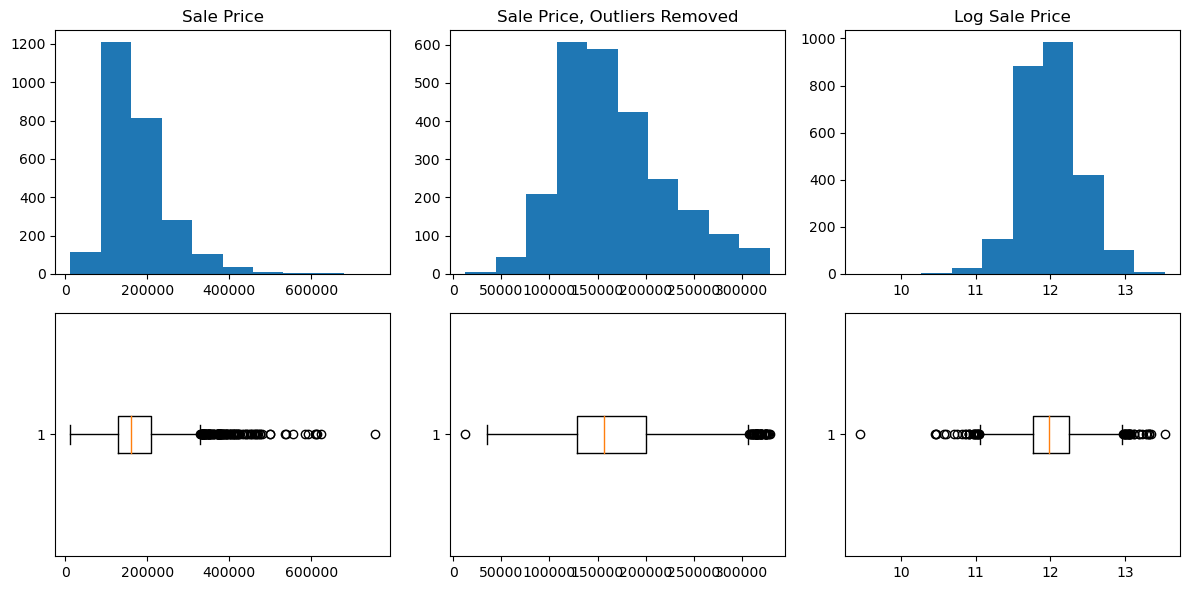

In [47]:
# comparing distributions after outlier removal and log transformation

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].set_title("Sale Price")
axs[0, 0].hist(housing['SalePrice'])
axs[1, 0].boxplot(housing['SalePrice'], vert=False)

axs[0, 1].set_title("Sale Price, Outliers Removed")
axs[0, 1].hist(price_trimmed['SalePrice'])
axs[1, 1].boxplot(price_trimmed['SalePrice'], vert=False)

axs[0, 2].set_title("Log Sale Price")
axs[0, 2].hist(housing['Log_SalePrice'])
axs[1, 2].boxplot(housing['Log_SalePrice'], vert=False)

fig.tight_layout()

In [49]:
housing_newfeat = pd.concat([features, price, log_price], axis = 1)

In [51]:
# export as csv
housing_newfeat.to_csv('data/houseprice_newfeat.csv', index=False)
price_trimmed.to_csv('data/price_trimmed.csv', index=False)
size_trimmed.to_csv('data/size_trimmed.csv', index=False)